In [1035]:
## Import Rewuired Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [1036]:
## Read Data
Data = pd.read_csv("Country-data.csv")

#### Check Data for Consistency

In [1037]:

Data.info()
Data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [1038]:
Data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [1039]:
Data.head

<bound method NDFrame.head of                             country  child_mort  exports  health  imports  \
0                       Afghanistan        90.2    10.00    7.58     44.9   
1                           Albania        16.6    28.00    6.55     48.6   
2                           Algeria        27.3    38.40    4.17     31.4   
3                            Angola       119.0    62.30    2.85     42.9   
4               Antigua and Barbuda        10.3    45.50    6.03     58.9   
5                         Argentina        14.5    18.90    8.10     16.0   
6                           Armenia        18.1    20.80    4.40     45.3   
7                         Australia         4.8    19.80    8.73     20.9   
8                           Austria         4.3    51.30   11.00     47.8   
9                        Azerbaijan        39.2    54.30    5.88     20.7   
10                          Bahamas        13.8    35.00    7.89     43.7   
11                          Bahrain         8.

In [1040]:
Data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Data Preparation

In [1041]:
#Data = Data.drop("country", axis=1)
Data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


#### First Convert the Columns represented as % to their absolute value

In [1042]:
## Convert Values represented as % to Absolute Values
Data.health = Data.health * (Data.gdpp/100)
Data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,41.9174,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,267.8950,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,185.9820,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,100.6050,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,735.6600,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,834.3000,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,141.6800,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,4530.8700,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,5159.0000,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,343.3920,20.7,16000,13.800,69.1,1.92,5840


In [1043]:
## And also rest of the Columns
Data.imports = Data.imports * (Data.imports/100)
Data.exports = Data.exports * (Data.exports/100)
Data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,1.0000,41.9174,20.1601,1610,9.44,56.2,5.82,553
1,Albania,16.6,7.8400,267.8950,23.6196,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,14.7456,185.9820,9.8596,12900,16.10,76.5,2.89,4460
3,Angola,119.0,38.8129,100.6050,18.4041,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,20.7025,735.6600,34.6921,19100,1.44,76.8,2.13,12200


#### Data Standardization

In [1044]:
df = Data
df = df.drop("country", axis=1)

## Using Standard Scalling
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
normalized_df = standard_scaler.fit_transform(df)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1045]:
normalized_df = pd.DataFrame(normalized_df)
normalized_df

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.525583,-0.565040,-0.212287,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.371745,-0.439218,-0.116321,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.216432,-0.484826,-0.498023,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.324864,-0.532363,-0.260999,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.082455,-0.178771,0.190830,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,-0.591177,-0.467734,-0.123849,-0.700513,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,-0.501643,-0.450769,-0.509493,-0.202279,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,-0.832423,-0.459900,1.934367,-0.650357,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,-0.844858,0.043818,2.284104,-0.137714,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,0.023128,0.115069,-0.397182,-0.652665,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


In [1046]:
normalized_df.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 
                         'total_fer', 'gdpp']
normalized_df


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.525583,-0.565040,-0.212287,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.371745,-0.439218,-0.116321,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.216432,-0.484826,-0.498023,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.324864,-0.532363,-0.260999,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.082455,-0.178771,0.190830,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,-0.591177,-0.467734,-0.123849,-0.700513,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,-0.501643,-0.450769,-0.509493,-0.202279,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,-0.832423,-0.459900,1.934367,-0.650357,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,-0.844858,0.043818,2.284104,-0.137714,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,0.023128,0.115069,-0.397182,-0.652665,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


Now that all the Data are standardized and normalized we can start PCA

### PCA

In [1047]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [1048]:
## Fit the Normalized Dataframe
pca.fit(normalized_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [1049]:
## PCA Component Analysis
pca.components_

array([[-3.76551902e-01,  2.44675910e-01,  3.62438474e-01,
         1.69648858e-01,  3.95904019e-01, -1.72057731e-01,
         3.95997669e-01, -3.62385786e-01,  4.04621447e-01],
       [ 2.38206196e-01,  6.28317814e-01, -8.09996332e-02,
         6.70329503e-01,  3.68680854e-02,  2.13040331e-02,
        -2.30031020e-01,  1.94458729e-01,  5.51043477e-03],
       [ 3.65983029e-01, -5.93632824e-02,  4.40563232e-01,
        -2.33355587e-01,  3.32030065e-01,  3.46473219e-01,
        -1.91556297e-01,  3.91435180e-01,  4.40202977e-01],
       [-2.09815707e-01,  1.35393610e-01, -2.29493102e-01,
         4.74756820e-03,  7.54606063e-02,  8.94164171e-01,
         2.12341770e-01, -1.50386570e-01, -1.09669046e-01],
       [ 6.32273640e-02,  9.91807839e-02, -6.14946007e-01,
        -2.60568291e-01,  7.03037372e-01, -1.90025522e-01,
        -9.72853549e-02,  1.65907635e-02,  3.28184366e-04],
       [ 1.91191537e-01, -1.19529229e-01,  8.73341455e-02,
         5.91190531e-02,  6.02520311e-02,  1.023568

In [1050]:
## Checking out the Scree Plot for Determining the No. of Variables to be considered
pca.explained_variance_ratio_

array([0.50744192, 0.18663094, 0.13217707, 0.09846594, 0.0308922 ,
       0.02495703, 0.00994841, 0.00770372, 0.00178279])

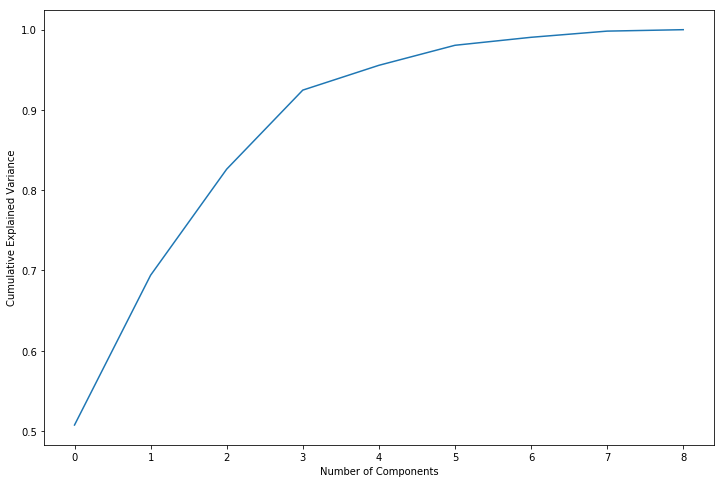

In [1051]:
## Plotting the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#### Looking at the Scree plot we can make out more than 90% of the values are covered at Number of Components taken as 4

In [1052]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [1053]:
## fit Normalized DF
df_pca = pca_final.fit_transform(normalized_df)
df_pca.shape

(167, 4)

In [1054]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

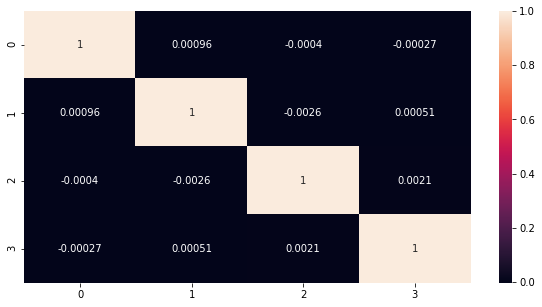

In [1055]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [1056]:
### COnverting the DF with PCA to a Dataframe
df_pca = pd.DataFrame(df_pca)

In [1057]:
df_pca.columns = ["PC1", "PC2", "PC3", "PC4"]

In [1058]:
finalDF = df_pca

In [1059]:
## Final DF before Outlier Treatment
finalDF.shape

(167, 4)

### Outlier Detection and Treatment

In [1060]:
## Checking Quartile wise value distribution of DF
finalDF.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PC1,PC2,PC3,PC4
count,167.000000,1.670000e+02,1.670000e+02,167.000000
mean,0.000000,4.254747e-17,2.659217e-18,0.000000
std,2.143472,1.299635e+00,1.093869e+00,0.943869
min,-4.459942,-1.631592e+00,-2.158604e+00,-1.983210
25%,-1.313490,-7.493401e-01,-8.963805e-01,-0.485713
50%,-0.116662,-1.673996e-01,-2.564703e-01,-0.106188
75%,1.024402,4.177045e-01,7.679813e-01,0.344054
90%,2.858718,8.787383e-01,1.352356e+00,0.920777
95%,3.729146,1.405308e+00,1.648842e+00,1.169035
99%,5.664310,6.253330e+00,3.081473e+00,3.010264


#### We Can See some Outliers values drawing Box Plot to Ascertain the same

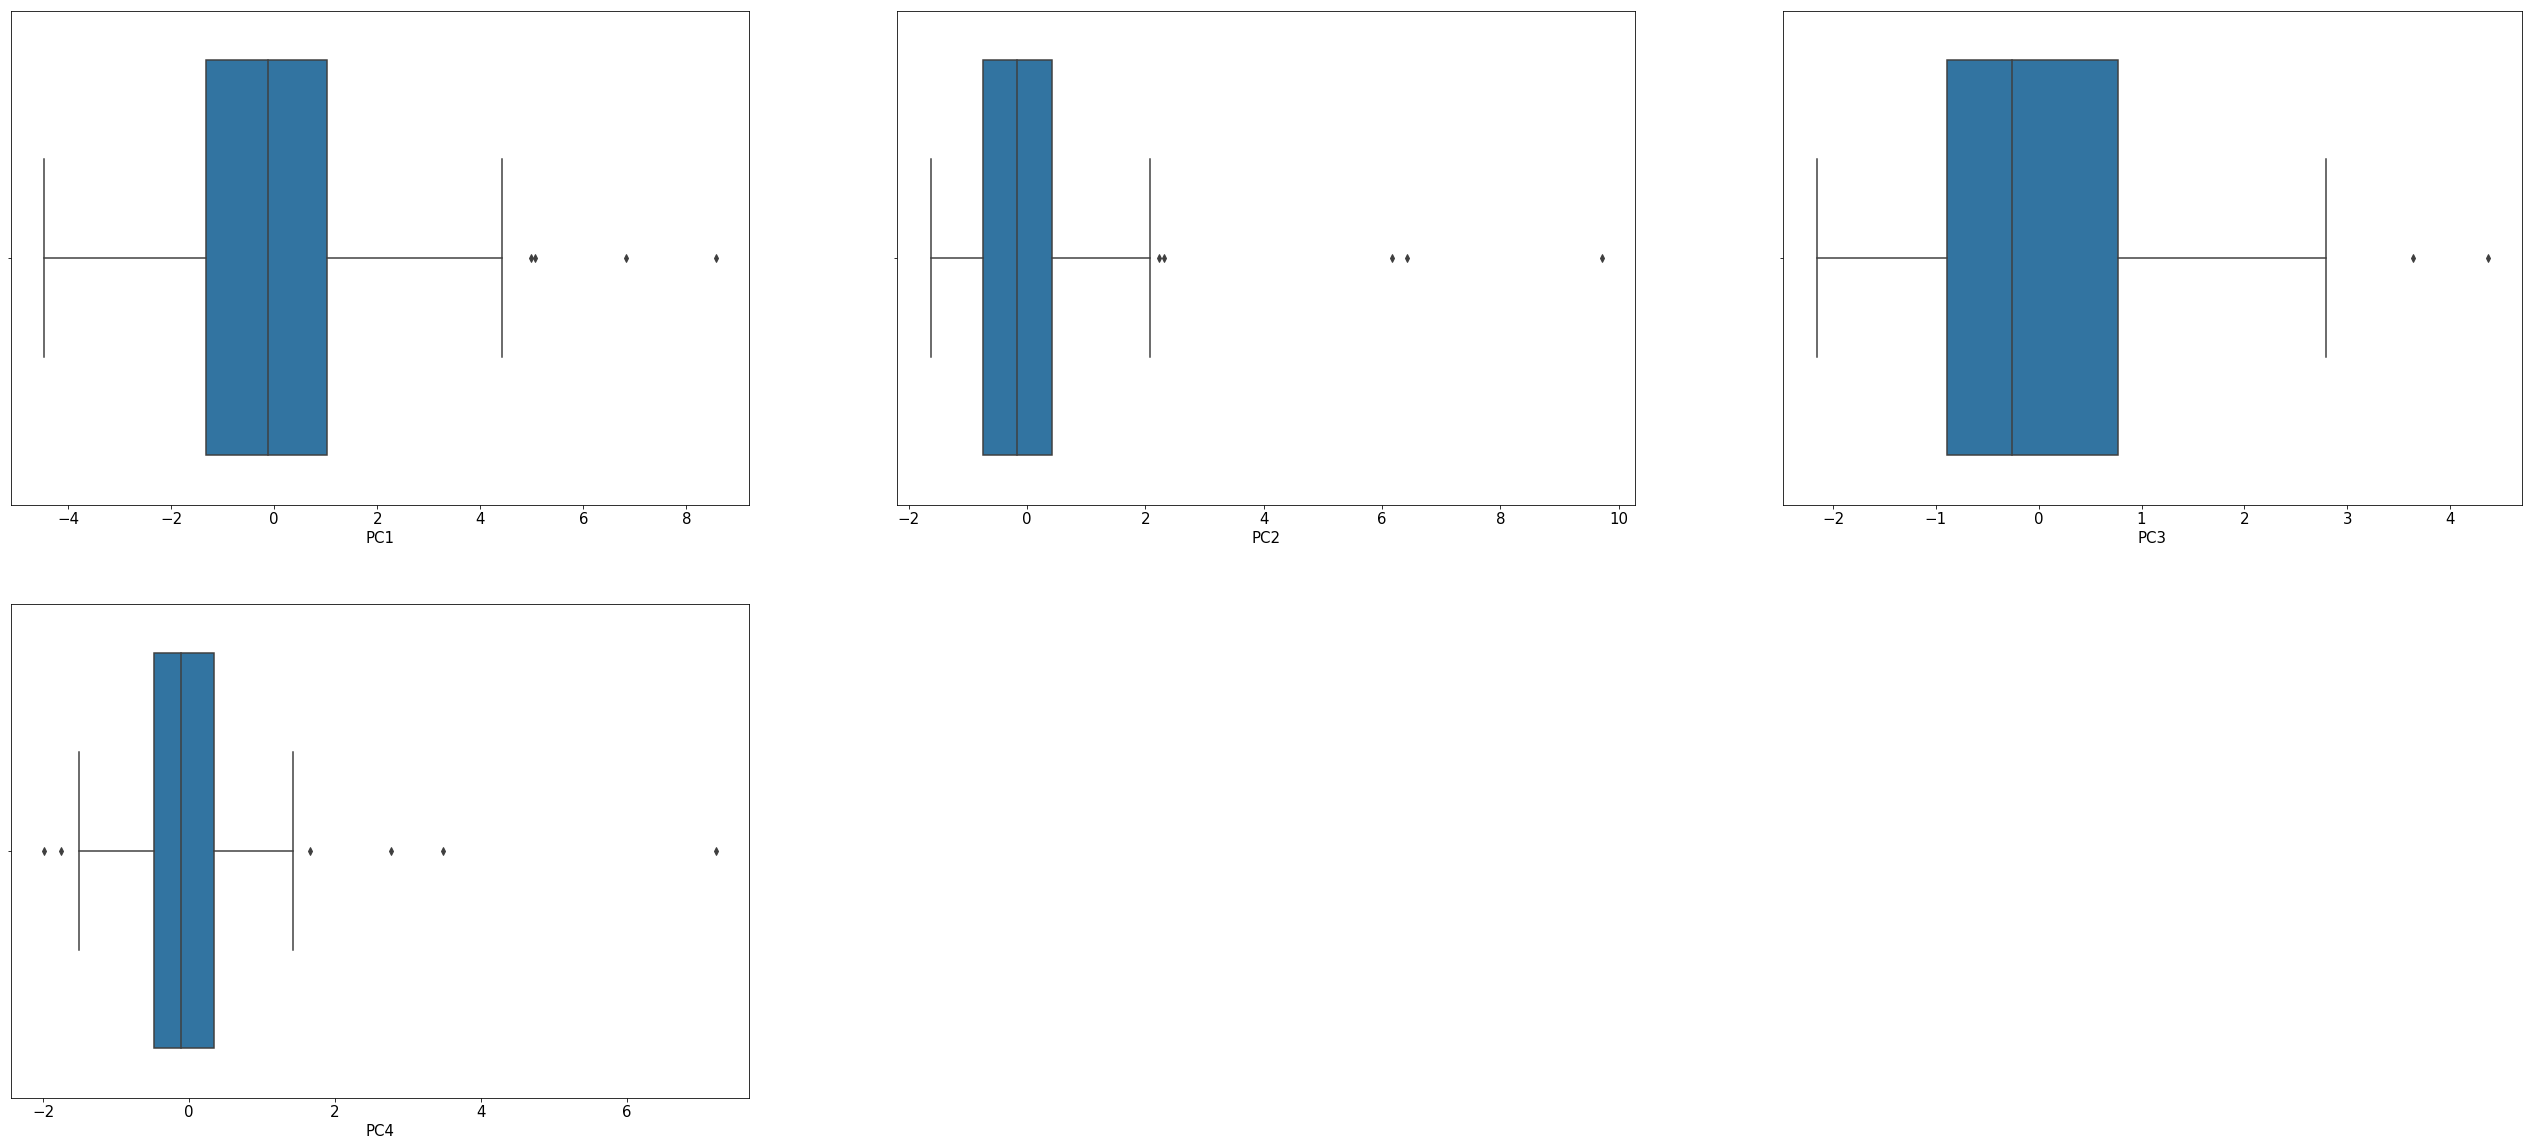

In [1061]:
## Plotting Box Plot for PC1, PC2, PC3, PC4
plt.figure(figsize=(45, 20))
plt.rcParams.update({'font.size': 15})
plt.subplot(2,3,1)
sns.boxplot(x=finalDF.PC1)
plt.subplot(2,3,2)
sns.boxplot(x=finalDF.PC2)
plt.subplot(2,3,3)
sns.boxplot(x=finalDF.PC3)
plt.subplot(2,3,4)
sns.boxplot(x=finalDF.PC4)

#### Considering only .95 Quantile and saving in another DF for futrure use

In [1062]:
## Checking PC1
finalDF = finalDF[finalDF.PC1 < finalDF.PC1.quantile(.95)]
print(finalDF.shape)
finalDF.describe(percentiles=[.25,.5,.75,.90,.95,.99])

(158, 4)


,PC1,PC2,PC3,PC4
count,158.000000,158.000000,158.000000,158.000000
mean,-0.285669,-0.123414,-0.079624,0.014695
std,1.787213,0.788734,0.962668,0.947667
min,-4.459942,-1.631592,-1.712890,-1.983210
25%,-1.550246,-0.749504,-0.898680,-0.459719
50%,-0.207311,-0.172030,-0.307773,-0.104757
75%,0.845574,0.385263,0.676354,0.333249
90%,2.262956,0.844293,1.188773,0.915778
95%,2.847201,1.139432,1.425668,1.172244
99%,3.344521,2.149469,2.109910,3.075264


In [1063]:
#Checking PC2
finalDF = finalDF[finalDF.PC2 < finalDF.PC2.quantile(.95)]
print(finalDF.shape)
finalDF.describe(percentiles=[.25,.5,.75,.90,.95,.99])

(150, 4)


,PC1,PC2,PC3,PC4
count,150.000000,150.000000,150.000000,150.000000
mean,-0.192300,-0.223356,-0.120353,0.039010
std,1.749497,0.669024,0.930082,0.939012
min,-4.459942,-1.631592,-1.484288,-1.759411
25%,-1.261938,-0.756540,-0.904916,-0.456207
50%,-0.140201,-0.204657,-0.366499,-0.101685
75%,0.877142,0.316960,0.638749,0.317664
90%,2.358376,0.708555,1.068506,0.958452
95%,2.865629,0.849322,1.319047,1.172578
99%,3.345112,1.036502,1.839820,3.133042


In [1064]:
##Checking PC3
finalDF = finalDF[finalDF.PC3 < finalDF.PC3.quantile(.95)]
print(finalDF.shape)
finalDF.describe(percentiles=[.25,.5,.75,.90,.95,.99])

(142, 4)


,PC1,PC2,PC3,PC4
count,142.000000,142.000000,142.000000,142.000000
mean,-0.233762,-0.219305,-0.233508,0.000662
std,1.600655,0.646828,0.787316,0.731811
min,-3.560812,-1.631592,-1.484288,-1.759411
25%,-1.254516,-0.749504,-0.926797,-0.398035
50%,-0.164246,-0.202655,-0.415200,-0.084055
75%,0.777568,0.310258,0.442148,0.317664
90%,2.038580,0.661557,0.955308,0.896872
95%,2.497520,0.815092,1.065444,1.158989
99%,3.208069,1.005750,1.250456,2.309881


In [1065]:
##Checking PC4 it has some outlier values less than .05% as well
finalDF = finalDF[finalDF.PC4 < finalDF.PC4.quantile(.95)]
finalDF = finalDF[finalDF.PC4 > finalDF.PC4.quantile(.05)]
print(finalDF.shape)
finalDF.describe(percentiles=[.25,.5,.75,.90,.95,.99])

(127, 4)


,PC1,PC2,PC3,PC4
count,127.000000,127.000000,127.000000,127.000000
mean,-0.083023,-0.251719,-0.332178,-0.033331
std,1.543706,0.633792,0.754906,0.502559
min,-2.986568,-1.631592,-1.484288,-0.996679
25%,-1.196082,-0.750851,-0.954772,-0.379627
50%,-0.087579,-0.318183,-0.501360,-0.100044
75%,0.847645,0.262868,0.214200,0.298397
90%,2.102396,0.618575,0.854796,0.657319
95%,2.647470,0.783624,1.020850,0.889050
99%,3.256827,0.946504,1.146845,1.062003


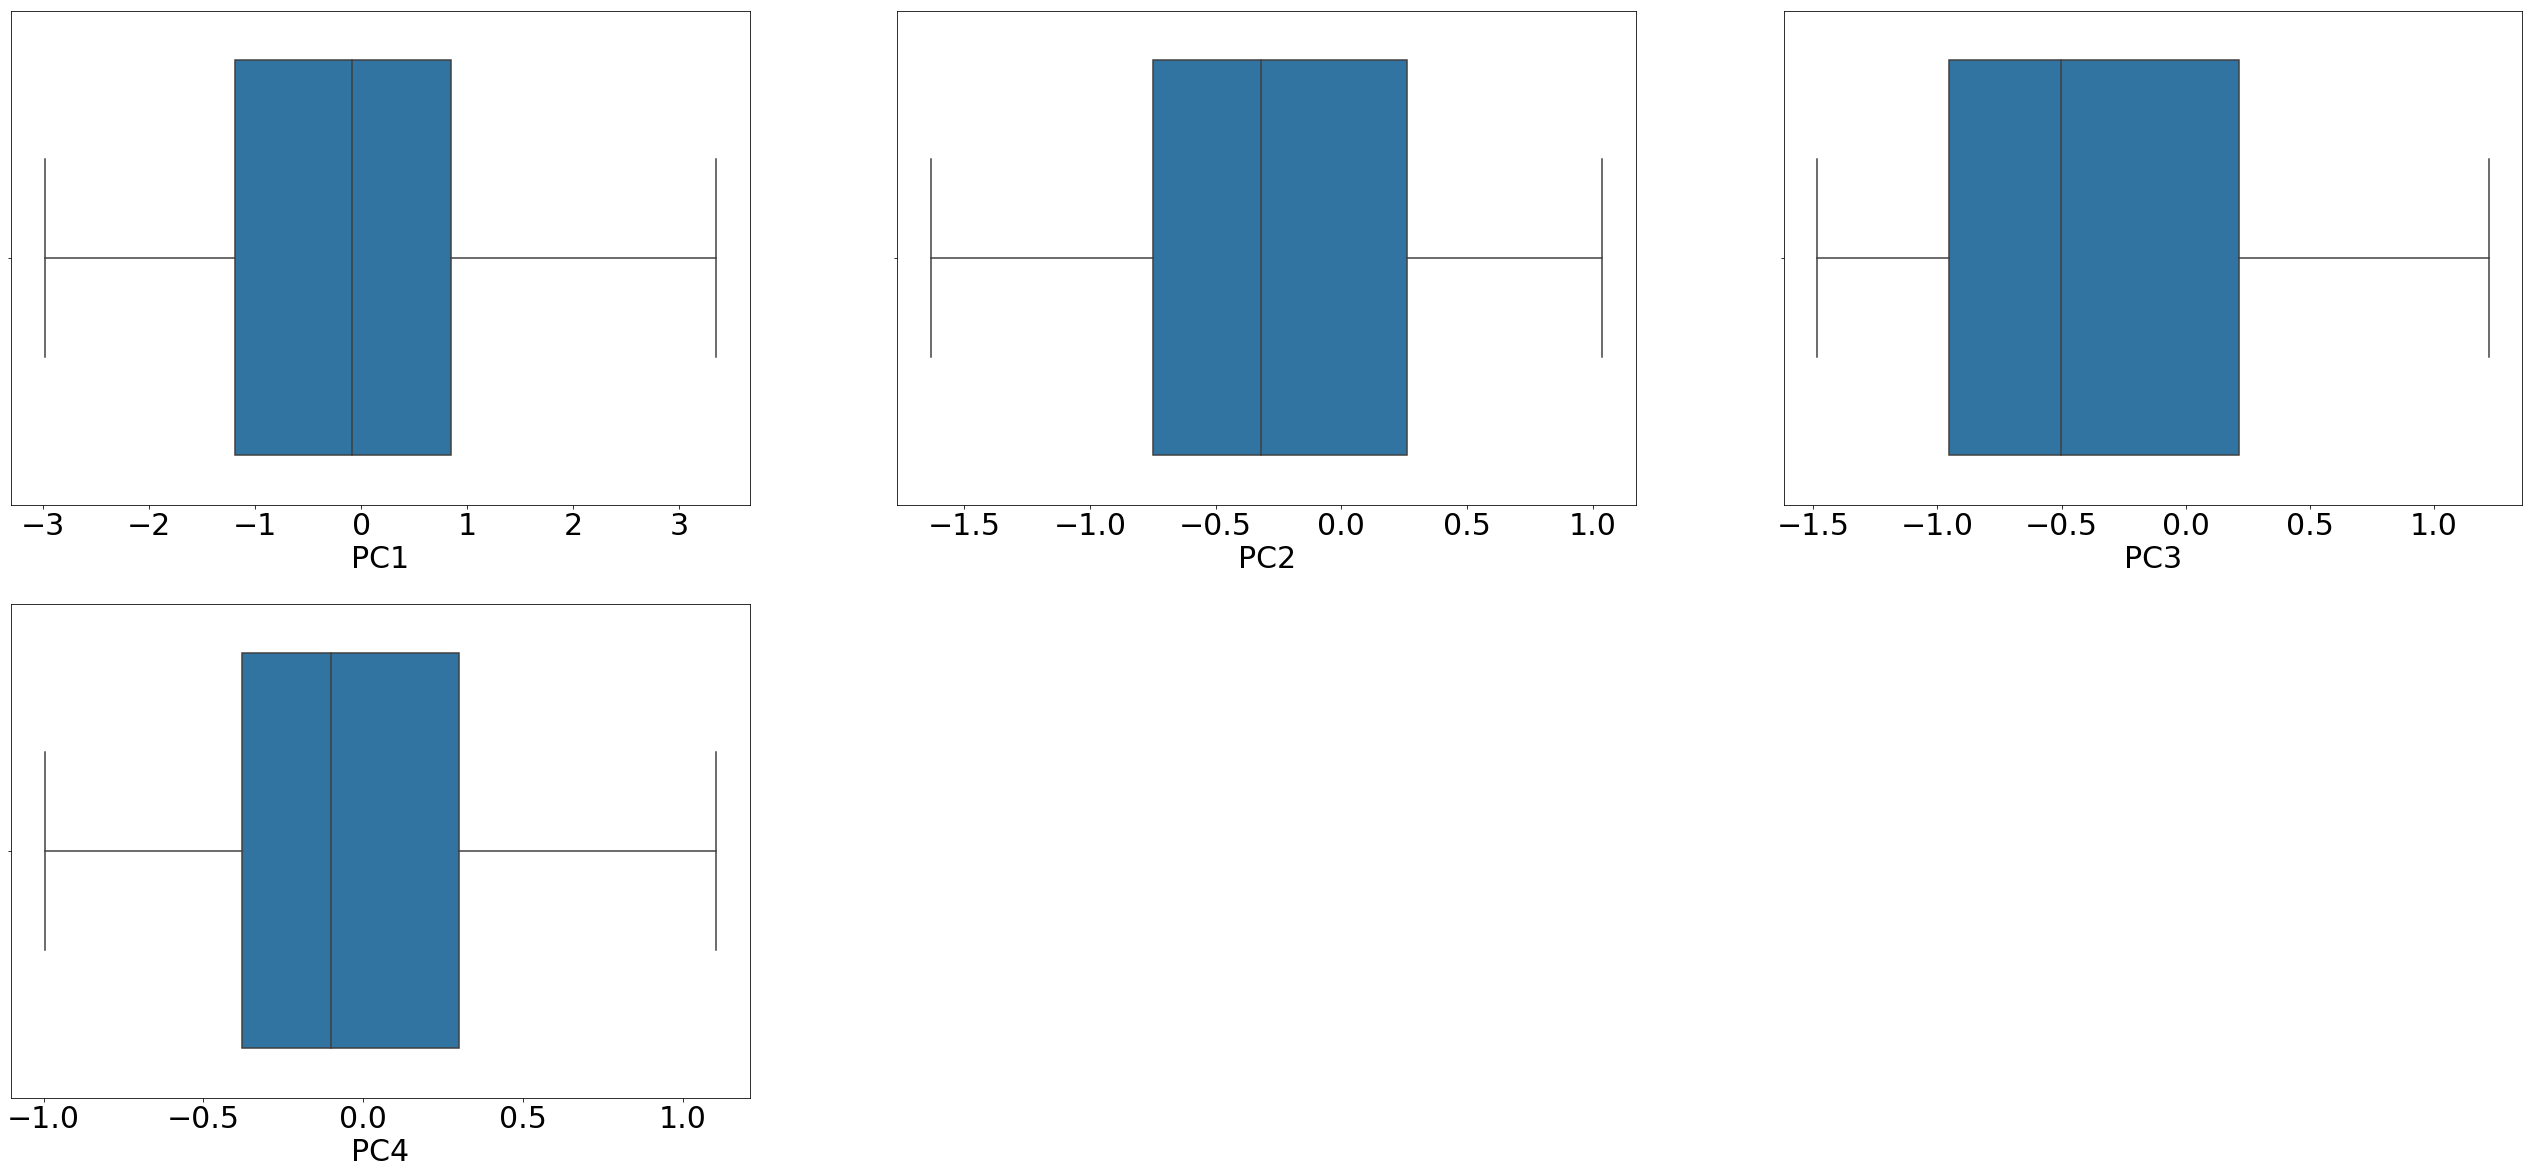

In [1066]:
## Plotting the Box Plot again to find out if Outliers are removed
plt.figure(figsize=(45, 20))
plt.rcParams.update({'font.size': 30})
plt.subplot(2,3,1)
sns.boxplot(x=finalDF.PC1)
plt.subplot(2,3,2)
sns.boxplot(x=finalDF.PC2)
plt.subplot(2,3,3)
sns.boxplot(x=finalDF.PC3)
plt.subplot(2,3,4)
sns.boxplot(x=finalDF.PC4)

In [1067]:
finalDF.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PC1,PC2,PC3,PC4
count,127.000000,127.000000,127.000000,127.000000
mean,-0.083023,-0.251719,-0.332178,-0.033331
std,1.543706,0.633792,0.754906,0.502559
min,-2.986568,-1.631592,-1.484288,-0.996679
25%,-1.196082,-0.750851,-0.954772,-0.379627
50%,-0.087579,-0.318183,-0.501360,-0.100044
75%,0.847645,0.262868,0.214200,0.298397
90%,2.102396,0.618575,0.854796,0.657319
95%,2.647470,0.783624,1.020850,0.889050
99%,3.256827,0.946504,1.146845,1.062003


In [1068]:
finalDF.shape

(127, 4)

In [1069]:
finalDF.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PC1,PC2,PC3,PC4
count,127.000000,127.000000,127.000000,127.000000
mean,-0.083023,-0.251719,-0.332178,-0.033331
std,1.543706,0.633792,0.754906,0.502559
min,-2.986568,-1.631592,-1.484288,-0.996679
25%,-1.196082,-0.750851,-0.954772,-0.379627
50%,-0.087579,-0.318183,-0.501360,-0.100044
75%,0.847645,0.262868,0.214200,0.298397
90%,2.102396,0.618575,0.854796,0.657319
95%,2.647470,0.783624,1.020850,0.889050
99%,3.256827,0.946504,1.146845,1.062003


### Check for Null Values in the new Dataframe

In [1070]:
finalDF.isnull().sum()

PC1    0
PC2    0
PC3    0
PC4    0
dtype: int64

##### There are no Null Values

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


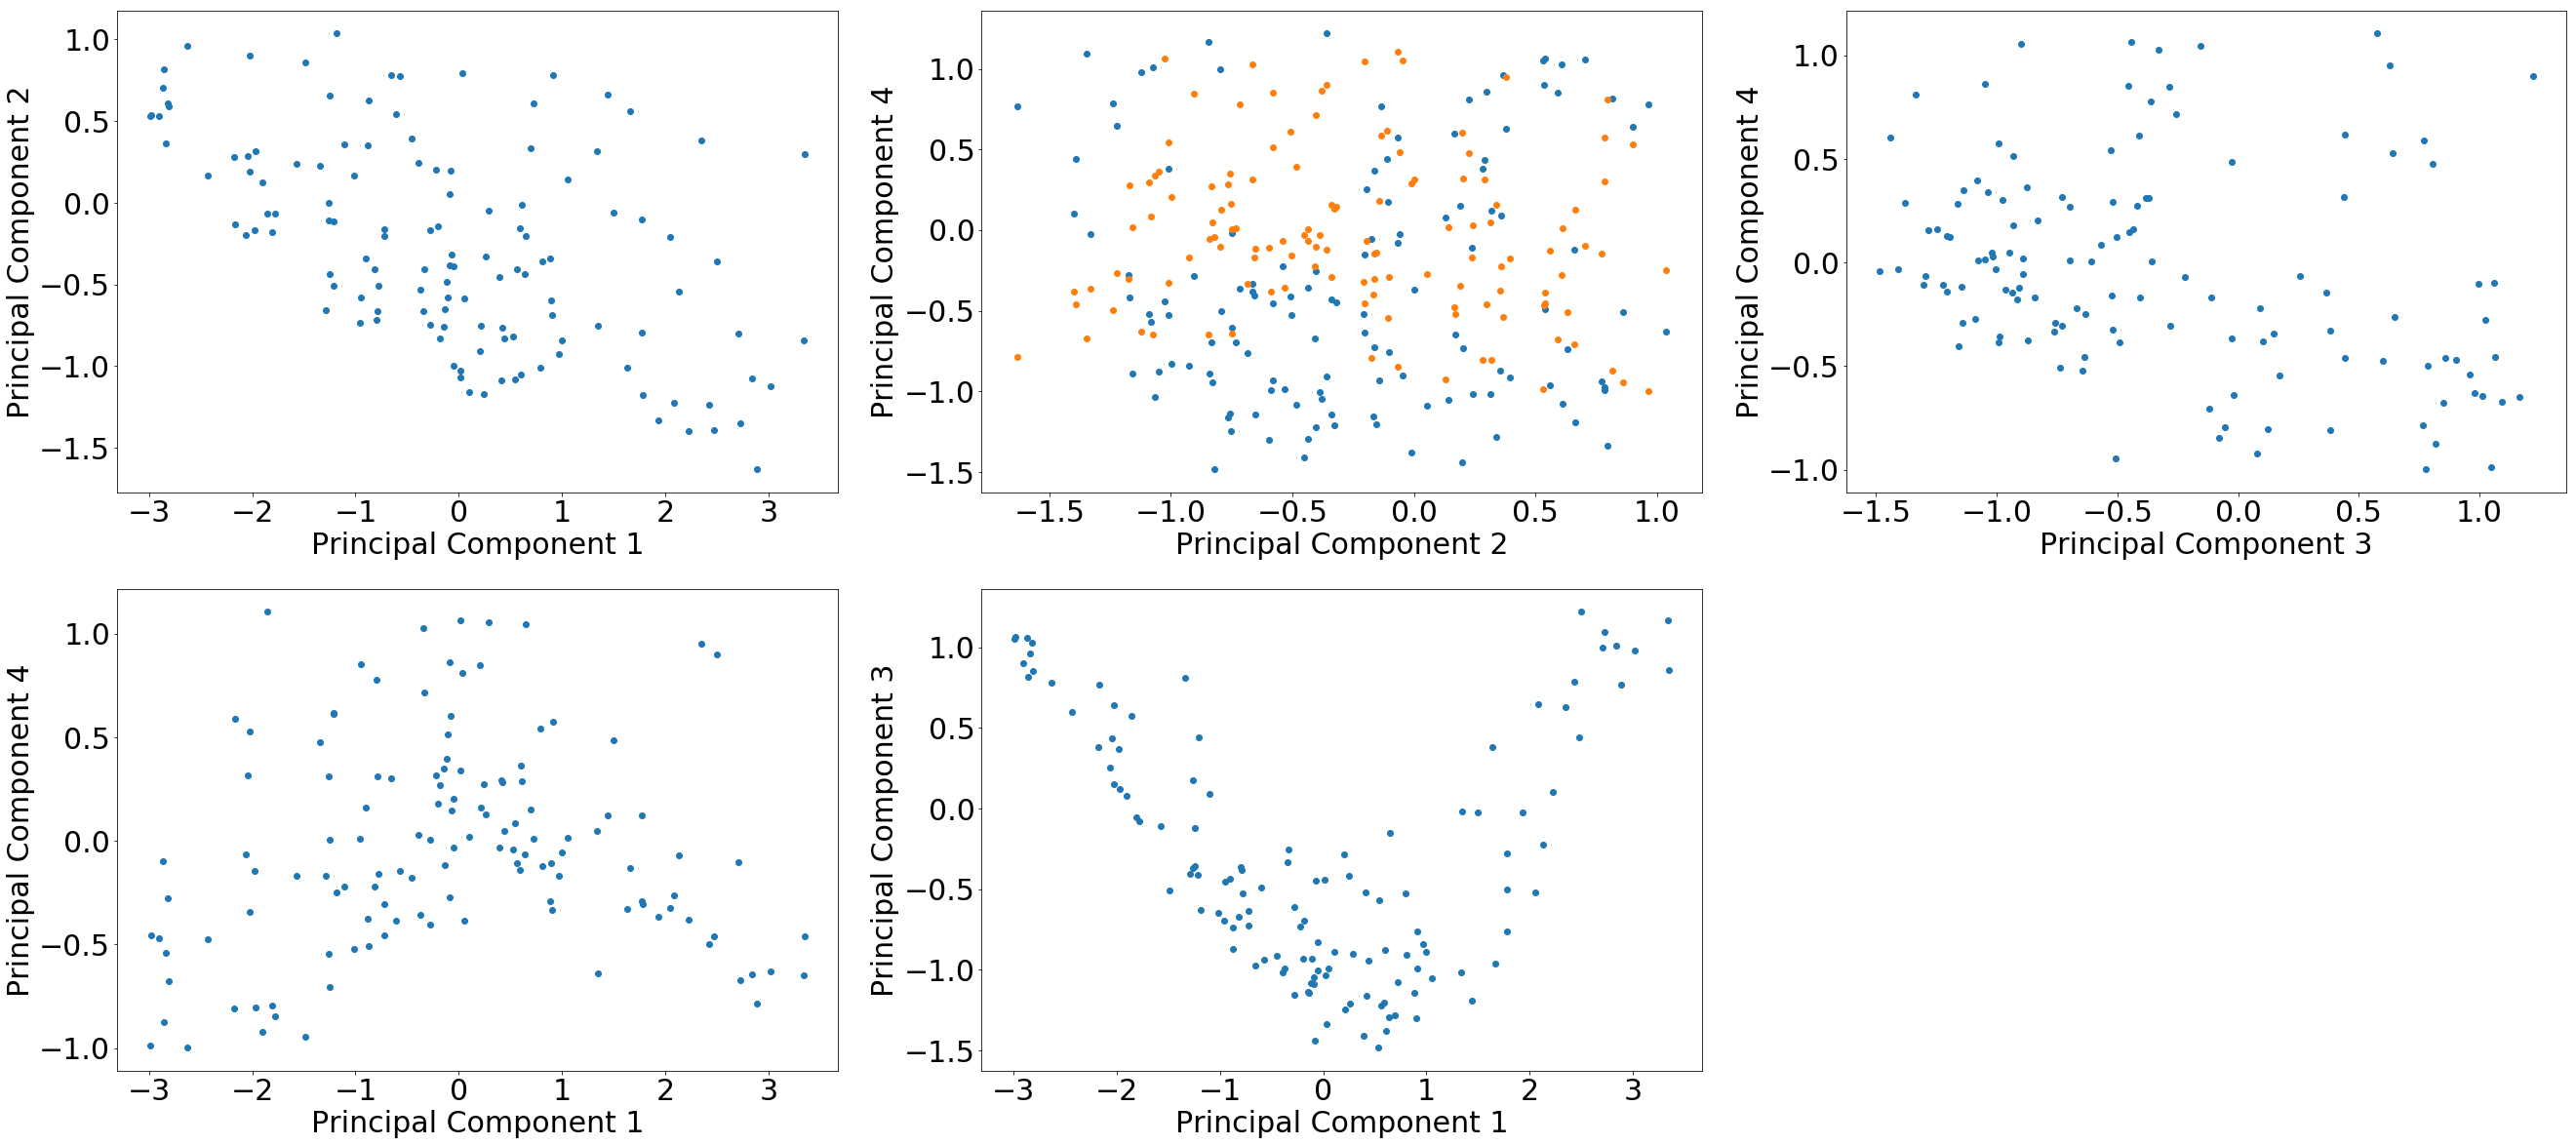

In [1071]:
## Plotting the Principle Components thus created
plt.figure(figsize=(45, 20))
plt.rcParams.update({'font.size': 30})

plt.subplot(2,3,1)
plt.scatter(finalDF.PC1, finalDF.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(2,3,2)
plt.scatter(finalDF.PC2, finalDF.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')

plt.subplot(2,3,3)
plt.scatter(finalDF.PC3, finalDF.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')

plt.subplot(2,3,4)
plt.scatter(finalDF.PC1, finalDF.PC4)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 4')

plt.subplot(2,3,5)
plt.scatter(finalDF.PC1, finalDF.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')

plt.subplot(2,3,2)
plt.scatter(finalDF.PC2, finalDF.PC4)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 4')
#for i, txt in enumerate(finalDF.country):
#    plt.annotate(finalDF.country, (finalDF.PC1[i],finalDF.PC2[i], finalDF.PC3[i], finalDF.PC4[i]))
#plt.tight_layout()
plt.show()

In [1072]:
## Hopkins Analysis Function
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [1073]:
#hopkinsDF = finalDF.drop(["Country"], axis=1)
hopkins(finalDF)

0.7017372190257741

### Hopkins Analysis Score is more than .7 so it highly suitable for Clustering

In [1074]:
finalDF.shape

(127, 4)

### Silhouette Score Analysis for getting an optimum Value of K to start with

In [1075]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(hopkinsDF)
    sse_.append([k, silhouette_score(hopkinsDF, kmeans.labels_)])

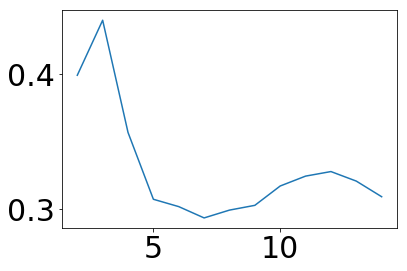

In [1076]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### We can see the Silhoutte Score is maximum between 3 and 4.

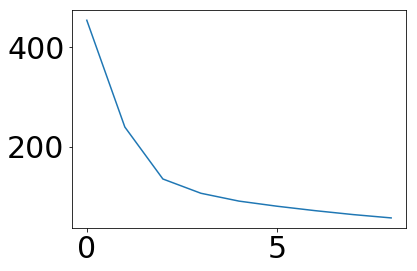

In [1077]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(hopkinsDF)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### We can make out that optimal value of K happens to be between 2 and 4 I am choosing it as 3

In [1078]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3, max_iter=50)
model_clus3.fit(hopkinsDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [1079]:
model_clus3.labels_

array([2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 1,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2], dtype=int32)

In [1080]:
finalKM =  pd.concat([Data, pd.Series(model_clus3.labels_)], axis=1)

In [1081]:
finalKM

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,1.000000,41.9174,20.1601,1610,9.440,56.2,5.82,553,2.0
1,Albania,16.6,7.840000,267.8950,23.6196,9930,4.490,76.3,1.65,4090,0.0
2,Algeria,27.3,14.745600,185.9820,9.8596,12900,16.100,76.5,2.89,4460,0.0
3,Angola,119.0,38.812900,100.6050,18.4041,5900,22.400,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,20.702500,735.6600,34.6921,19100,1.440,76.8,2.13,12200,0.0
5,Argentina,14.5,3.572100,834.3000,2.5600,18700,20.900,75.8,2.37,10300,1.0
6,Armenia,18.1,4.326400,141.6800,20.5209,6700,7.770,73.3,1.69,3220,0.0
7,Australia,4.8,3.920400,4530.8700,4.3681,41400,1.160,82.0,1.93,51900,1.0
8,Austria,4.3,26.316900,5159.0000,22.8484,43200,0.873,80.5,1.44,46900,1.0
9,Azerbaijan,39.2,29.484900,343.3920,4.2849,16000,13.800,69.1,1.92,5840,0.0


In [1082]:
## Renaming the New Variable thus obtained
finalKM = finalKM.rename(columns = {0:'ClusterID'})
finalKM

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,1.000000,41.9174,20.1601,1610,9.440,56.2,5.82,553,2.0
1,Albania,16.6,7.840000,267.8950,23.6196,9930,4.490,76.3,1.65,4090,0.0
2,Algeria,27.3,14.745600,185.9820,9.8596,12900,16.100,76.5,2.89,4460,0.0
3,Angola,119.0,38.812900,100.6050,18.4041,5900,22.400,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,20.702500,735.6600,34.6921,19100,1.440,76.8,2.13,12200,0.0
5,Argentina,14.5,3.572100,834.3000,2.5600,18700,20.900,75.8,2.37,10300,1.0
6,Armenia,18.1,4.326400,141.6800,20.5209,6700,7.770,73.3,1.69,3220,0.0
7,Australia,4.8,3.920400,4530.8700,4.3681,41400,1.160,82.0,1.93,51900,1.0
8,Austria,4.3,26.316900,5159.0000,22.8484,43200,0.873,80.5,1.44,46900,1.0
9,Azerbaijan,39.2,29.484900,343.3920,4.2849,16000,13.800,69.1,1.92,5840,0.0


In [1083]:
finalKM.isnull().sum()

country        0
child_mort     0
exports        0
health         0
imports        0
income         0
inflation      0
life_expec     0
total_fer      0
gdpp           0
ClusterID     40
dtype: int64

In [1084]:
## Fil the NA values with another Cluster as these are the rows which were removed while Outlier Treatment
finalKM = finalKM.fillna(3)
print(finalKM.isnull().sum())
finalKM

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
ClusterID     0
dtype: int64


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,1.000000,41.9174,20.1601,1610,9.440,56.2,5.82,553,2.0
1,Albania,16.6,7.840000,267.8950,23.6196,9930,4.490,76.3,1.65,4090,0.0
2,Algeria,27.3,14.745600,185.9820,9.8596,12900,16.100,76.5,2.89,4460,0.0
3,Angola,119.0,38.812900,100.6050,18.4041,5900,22.400,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,20.702500,735.6600,34.6921,19100,1.440,76.8,2.13,12200,0.0
5,Argentina,14.5,3.572100,834.3000,2.5600,18700,20.900,75.8,2.37,10300,1.0
6,Armenia,18.1,4.326400,141.6800,20.5209,6700,7.770,73.3,1.69,3220,0.0
7,Australia,4.8,3.920400,4530.8700,4.3681,41400,1.160,82.0,1.93,51900,1.0
8,Austria,4.3,26.316900,5159.0000,22.8484,43200,0.873,80.5,1.44,46900,1.0
9,Azerbaijan,39.2,29.484900,343.3920,4.2849,16000,13.800,69.1,1.92,5840,0.0


In [1085]:
##Creating Individual Mean DF for Plotting using the K Means DF 
km_clustersChild = pd.DataFrame(finalKM.groupby(["ClusterID"]).child_mort.mean())
km_clustersExport = pd.DataFrame(finalKM.groupby(["ClusterID"]).exports.mean())
km_clustershealth = pd.DataFrame(finalKM.groupby(["ClusterID"]).health.mean())
km_clustersImport = pd.DataFrame(finalKM.groupby(["ClusterID"]).imports.mean())
km_clustersIncome = pd.DataFrame(finalKM.groupby(["ClusterID"]).income.mean())
km_clustersInf = pd.DataFrame(finalKM.groupby(["ClusterID"]).inflation.mean())
km_clustersLife = pd.DataFrame(finalKM.groupby(["ClusterID"]).life_expec.mean())
km_clustersFert = pd.DataFrame(finalKM.groupby(["ClusterID"]).total_fer.mean())
km_clustersGDP = pd.DataFrame(finalKM.groupby(["ClusterID"]).gdpp.mean())

In [1086]:
finalKM.shape

(167, 11)

In [1087]:
## Final Concatination of the Dataframe for Calculating Means Cluster Wise
df = pd.concat([pd.Series([0,1,2]), km_clustersChild, km_clustersExport, km_clustershealth, km_clustersImport, 
               km_clustersIncome, km_clustersInf,km_clustersLife, km_clustersFert,km_clustersGDP], axis=1)
df.columns = ["ClusterID", "ChildMortality", "Export", "Health", "Import", "Income", "Inflation", "LifeExpec",
             "Fertility", "GDP"]
df.head()

,ClusterID,ChildMortality,Export,Health,Import,Income,Inflation,LifeExpec,Fertility,GDP
ClusterID,,,,,,,,,,
0.0,0.0,36.088889,27.406055,945.060054,27.377914,19230.111111,8.599389,71.368056,2.805000,13320.513889
1.0,1.0,49.100000,11.391345,1030.949523,21.918395,12856.636364,5.910864,67.895455,3.119091,11243.136364
2.0,2.0,42.681818,20.154941,1220.209685,28.660070,15201.181818,6.369727,69.933333,3.136667,13078.969697
3.0,NaN,32.600000,29.515220,1137.057802,31.138805,17352.750000,8.504250,71.070000,2.955500,13174.550000


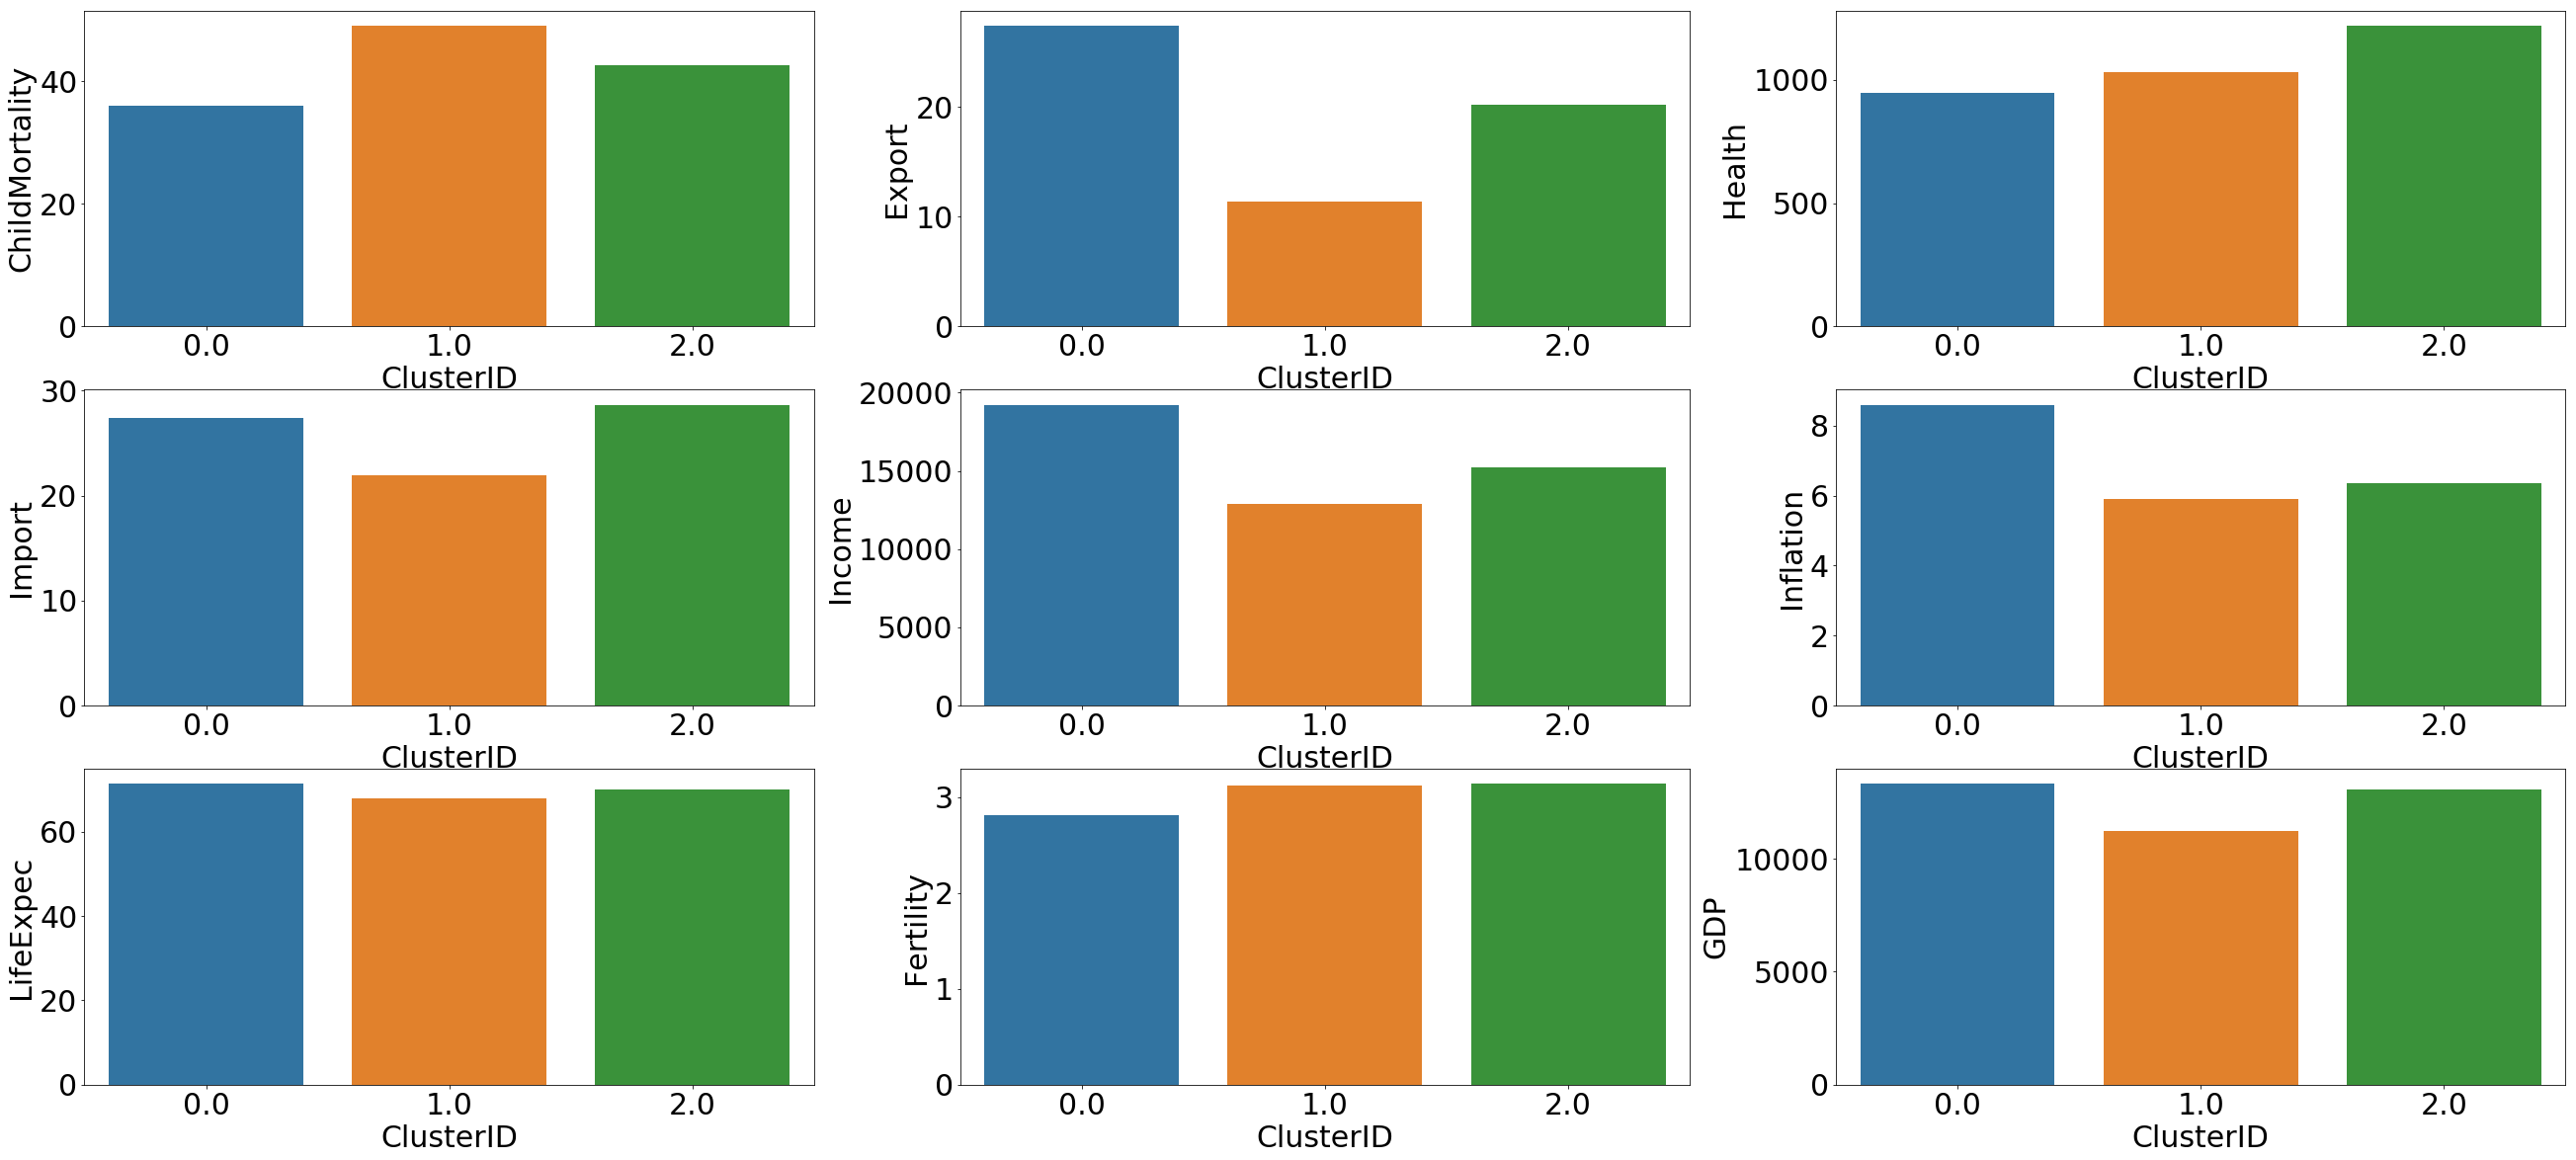

In [1088]:
## Plotting the Variables
plt.figure(figsize=(45, 20))
plt.rcParams.update({'font.size': 30})
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df.ChildMortality)
plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df.Export)
plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df.Health)
plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df.Import)
plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df.Income)
plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df.Inflation)
plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df.LifeExpec)
plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df.Fertility)
plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df.GDP)

#### We can see the 3rd Cluster is the one wth Lowest GDP, high Child Mortality, moderate spending on Health, low 
#### Net Income per person so I think this is the cluster I would reccommend.
#### Countries in this Group

In [1089]:
finalKM.loc[finalKM['ClusterID'].isin([2])]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,1.000000,41.9174,20.1601,1610,9.440,56.2,5.82,553,2.0
17,Benin,111.0,5.664400,31.0780,13.8384,1820,0.885,61.8,5.36,758,2.0
20,Bosnia and Herzegovina,6.9,8.820900,511.7100,26.3169,9720,1.400,76.8,1.31,4610,2.0
21,Botswana,52.5,19.009600,527.0500,26.3169,13300,8.920,57.1,2.88,6350,2.0
27,Cambodia,44.4,29.268100,44.6448,35.4025,2520,3.120,66.1,2.88,786,2.0
29,Canada,5.6,8.468100,5356.2000,9.6100,40700,2.870,81.3,1.63,47400,2.0
37,"Congo, Dem. Rep.",116.0,16.892100,26.4194,24.6016,609,20.800,57.5,6.54,334,2.0
42,Cyprus,3.6,25.200400,1838.7600,33.0625,33900,2.010,79.9,1.42,30800,2.0
43,Czech Republic,3.4,43.560000,1560.2400,39.5641,28300,-1.430,77.5,1.51,19800,2.0
46,Ecuador,25.1,7.784100,375.5960,10.4976,9350,7.470,76.7,2.66,4660,2.0


#### Choosing K = 4

In [1090]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(hopkinsDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [1091]:
## Merging with Original Datamicr
finalKM4 =  pd.concat([Data, pd.Series(model_clus4.labels_)], axis=1)

In [1092]:
finalKM4 = finalKM4.rename(columns = {0:'ClusterID'})
finalKM4

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,1.000000,41.9174,20.1601,1610,9.440,56.2,5.82,553,3.0
1,Albania,16.6,7.840000,267.8950,23.6196,9930,4.490,76.3,1.65,4090,0.0
2,Algeria,27.3,14.745600,185.9820,9.8596,12900,16.100,76.5,2.89,4460,0.0
3,Angola,119.0,38.812900,100.6050,18.4041,5900,22.400,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,20.702500,735.6600,34.6921,19100,1.440,76.8,2.13,12200,0.0
5,Argentina,14.5,3.572100,834.3000,2.5600,18700,20.900,75.8,2.37,10300,2.0
6,Armenia,18.1,4.326400,141.6800,20.5209,6700,7.770,73.3,1.69,3220,0.0
7,Australia,4.8,3.920400,4530.8700,4.3681,41400,1.160,82.0,1.93,51900,2.0
8,Austria,4.3,26.316900,5159.0000,22.8484,43200,0.873,80.5,1.44,46900,2.0
9,Azerbaijan,39.2,29.484900,343.3920,4.2849,16000,13.800,69.1,1.92,5840,1.0


In [1093]:
finalKM4 = finalKM4.fillna(4)
print(finalKM4.isnull().sum())
finalKM4

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
ClusterID     0
dtype: int64


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,1.000000,41.9174,20.1601,1610,9.440,56.2,5.82,553,3.0
1,Albania,16.6,7.840000,267.8950,23.6196,9930,4.490,76.3,1.65,4090,0.0
2,Algeria,27.3,14.745600,185.9820,9.8596,12900,16.100,76.5,2.89,4460,0.0
3,Angola,119.0,38.812900,100.6050,18.4041,5900,22.400,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,20.702500,735.6600,34.6921,19100,1.440,76.8,2.13,12200,0.0
5,Argentina,14.5,3.572100,834.3000,2.5600,18700,20.900,75.8,2.37,10300,2.0
6,Armenia,18.1,4.326400,141.6800,20.5209,6700,7.770,73.3,1.69,3220,0.0
7,Australia,4.8,3.920400,4530.8700,4.3681,41400,1.160,82.0,1.93,51900,2.0
8,Austria,4.3,26.316900,5159.0000,22.8484,43200,0.873,80.5,1.44,46900,2.0
9,Azerbaijan,39.2,29.484900,343.3920,4.2849,16000,13.800,69.1,1.92,5840,1.0


In [1094]:
km_clustersChild4 = pd.DataFrame(finalKM4.groupby(["ClusterID"]).child_mort.mean())
km_clustersExport4 = pd.DataFrame(finalKM4.groupby(["ClusterID"]).exports.mean())
km_clustershealth4 = pd.DataFrame(finalKM4.groupby(["ClusterID"]).health.mean())
km_clustersImport4 = pd.DataFrame(finalKM4.groupby(["ClusterID"]).imports.mean())
km_clustersIncome4 = pd.DataFrame(finalKM4.groupby(["ClusterID"]).income.mean())
km_clustersInf4 = pd.DataFrame(finalKM4.groupby(["ClusterID"]).inflation.mean())
km_clustersLife4 = pd.DataFrame(finalKM4.groupby(["ClusterID"]).life_expec.mean())
km_clustersFert4 = pd.DataFrame(finalKM4.groupby(["ClusterID"]).total_fer.mean())
km_clustersGDP4 = pd.DataFrame(finalKM4.groupby(["ClusterID"]).gdpp.mean())

In [1095]:
df4 = pd.concat([pd.Series([0,1,2,3]), km_clustersChild4, km_clustersExport4, km_clustershealth4, km_clustersImport4, 
               km_clustersIncome4, km_clustersInf4,km_clustersLife4, km_clustersFert4,km_clustersGDP4], axis=1)
df4.columns = ["ClusterID", "ChildMortality", "Export", "Health", "Import", "Income", "Inflation", "LifeExpec",
              "Fertility", "GDP"]
df4.head()

,ClusterID,ChildMortality,Export,Health,Import,Income,Inflation,LifeExpec,Fertility,GDP
ClusterID,,,,,,,,,,
0.0,0.0,33.877778,24.821418,947.938180,25.608314,17811.814815,6.902130,71.638889,2.896852,12894.537037
1.0,1.0,40.885714,30.564861,1091.715400,31.266539,20762.857143,11.152214,70.582143,2.566071,14028.821429
2.0,2.0,49.100000,11.391345,1030.949523,21.918395,12856.636364,5.910864,67.895455,3.119091,11243.136364
3.0,3.0,44.900000,19.225058,1154.545678,28.638265,14913.434783,6.277391,69.630435,3.356087,13111.782609
4.0,NaN,32.600000,29.515220,1137.057802,31.138805,17352.750000,8.504250,71.070000,2.955500,13174.550000


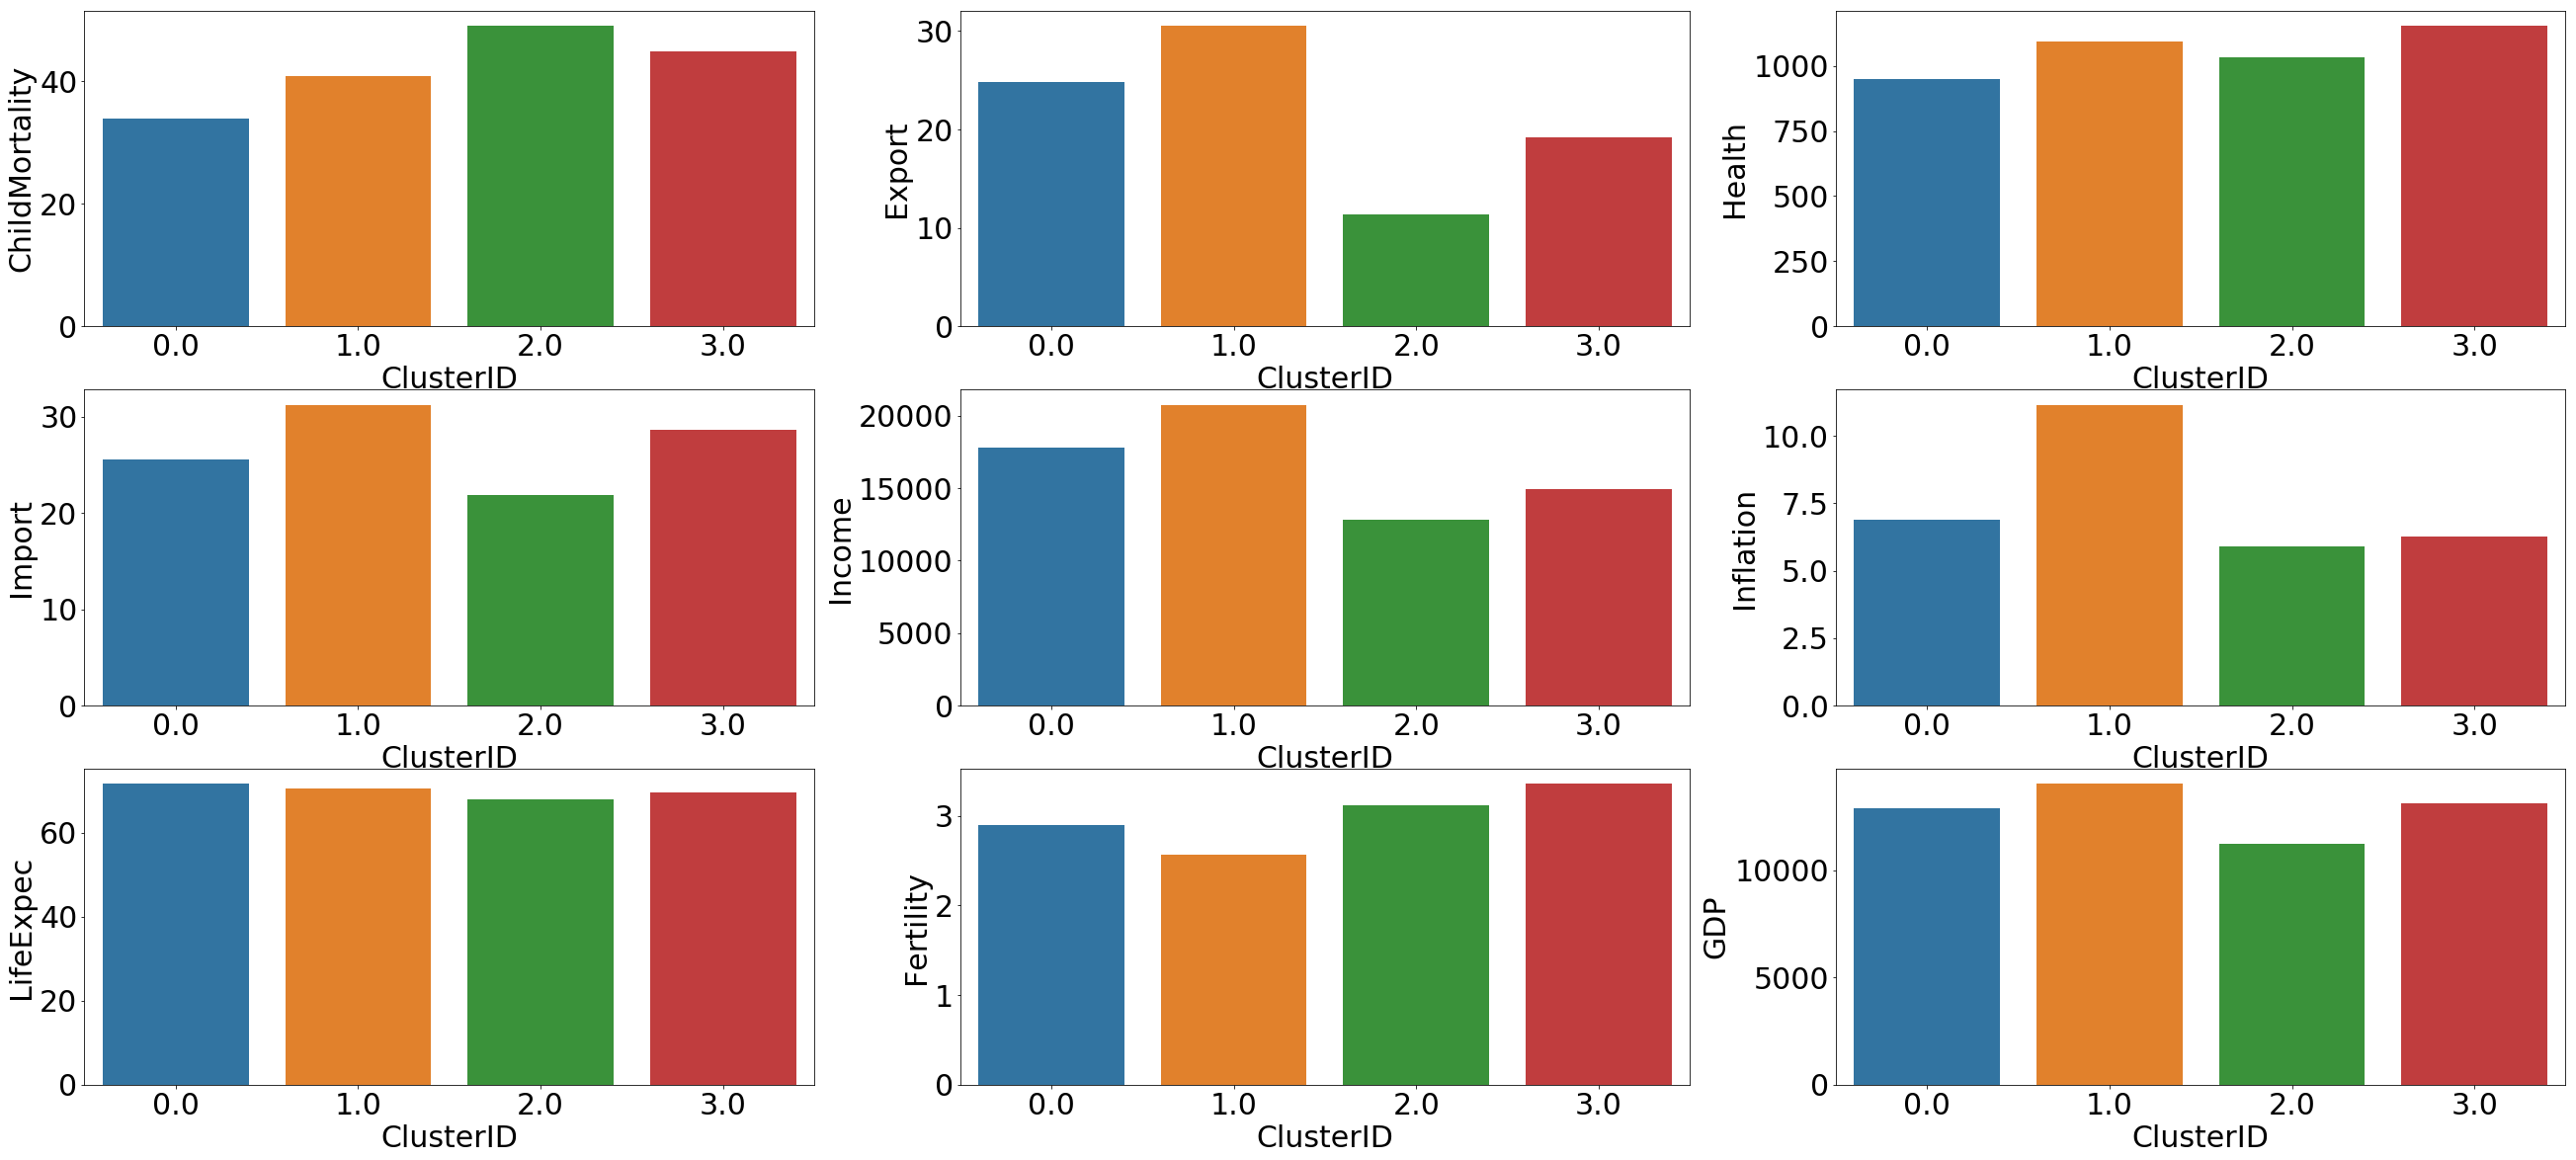

In [1096]:
plt.figure(figsize=(45, 20))
plt.rcParams.update({'font.size': 30})
plt.subplot(3,3,1)
sns.barplot(x=df4.ClusterID, y=df4.ChildMortality)
plt.subplot(3,3,2)
sns.barplot(x=df4.ClusterID, y=df4.Export)
plt.subplot(3,3,3)
sns.barplot(x=df4.ClusterID, y=df4.Health)
plt.subplot(3,3,4)
sns.barplot(x=df4.ClusterID, y=df4.Import)
plt.subplot(3,3,5)
sns.barplot(x=df4.ClusterID, y=df4.Income)
plt.subplot(3,3,6)
sns.barplot(x=df4.ClusterID, y=df4.Inflation)
plt.subplot(3,3,7)
sns.barplot(x=df4.ClusterID, y=df4.LifeExpec)
plt.subplot(3,3,8)
sns.barplot(x=df4.ClusterID, y=df4.Fertility)
plt.subplot(3,3,9)
sns.barplot(x=df4.ClusterID, y=df4.GDP)

In [1098]:
finalKM4.loc[finalKM4['ClusterID'].isin([2])]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
5,Argentina,14.5,3.5721,834.3000,2.5600,18700,20.900,75.8,2.37,10300,2.0
7,Australia,4.8,3.9204,4530.8700,4.3681,41400,1.160,82.0,1.93,51900,2.0
8,Austria,4.3,26.3169,5159.0000,22.8484,43200,0.873,80.5,1.44,46900,2.0
12,Bangladesh,49.4,2.5600,26.6816,4.7524,2440,7.140,70.4,2.33,758,2.0
31,Central African Republic,149.0,1.3924,17.7508,7.0225,888,2.010,47.5,5.21,446,2.0
32,Chad,150.0,13.5424,40.6341,18.9225,1930,6.390,56.5,6.59,897,2.0
40,Cote d'Ivoire,111.0,25.6036,64.6600,18.7489,2690,5.390,56.3,5.27,1220,2.0
41,Croatia,5.5,14.1376,1047.6000,14.5161,20100,0.821,76.3,1.55,13500,2.0
45,Dominican Republic,34.4,5.1529,338.9900,11.0889,11100,5.440,74.6,2.60,5450,2.0
47,Egypt,29.1,4.5369,121.1600,7.0756,9860,10.100,70.5,3.19,2600,2.0


### Using Hierarichal Clustering

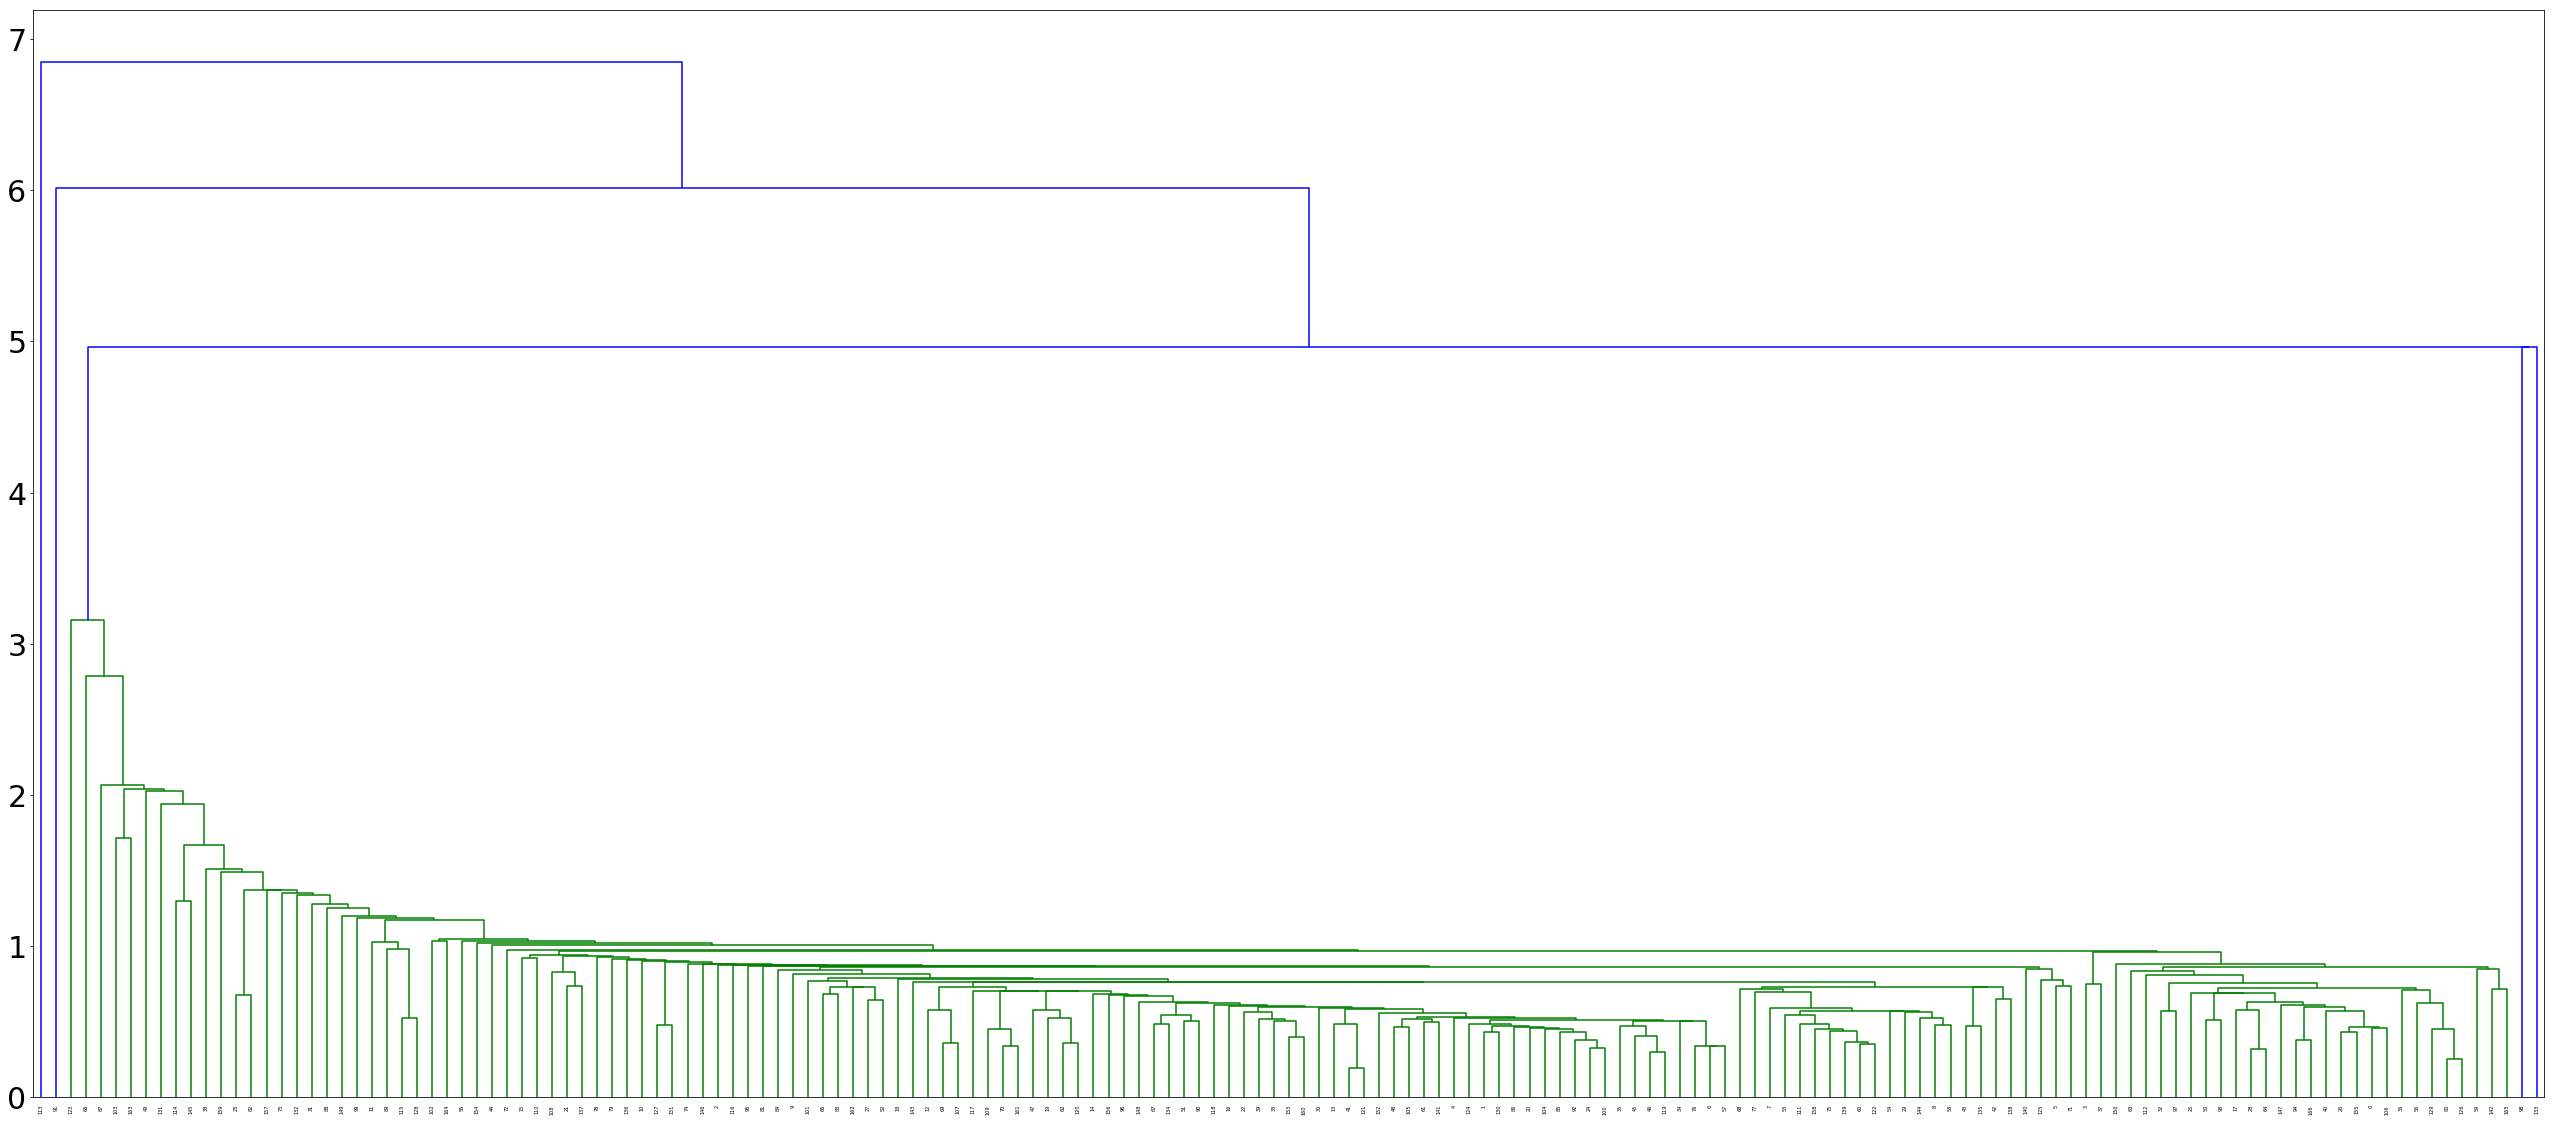

In [1099]:
## Plotting the DendoGrams with Single Method
plt.figure(figsize=(45, 20))
#hierDF = finalDF.drop("Country", axis=1)
mergings = linkage(normalized_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [1100]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
heiraDFSingl = pd.concat([Data, clusterCut], axis=1)
heiraDFSingl

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,1.000000,41.9174,20.1601,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,7.840000,267.8950,23.6196,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,14.745600,185.9820,9.8596,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,38.812900,100.6050,18.4041,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,20.702500,735.6600,34.6921,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,3.572100,834.3000,2.5600,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,4.326400,141.6800,20.5209,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,3.920400,4530.8700,4.3681,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,26.316900,5159.0000,22.8484,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,29.484900,343.3920,4.2849,16000,13.800,69.1,1.92,5840,0


In [1101]:
heiraDFSingl = heiraDFSingl.rename(columns = {0:'ClusterID'})

In [1102]:
hrS_clustersChild = pd.DataFrame(heiraDFSingl.groupby(["ClusterID"]).child_mort.mean())
hrS_clustersExport = pd.DataFrame(heiraDFSingl.groupby(["ClusterID"]).exports.mean())
hrS_clustershealth = pd.DataFrame(heiraDFSingl.groupby(["ClusterID"]).health.mean())
hrS_clustersImport = pd.DataFrame(heiraDFSingl.groupby(["ClusterID"]).imports.mean())
hrS_clustersIncome = pd.DataFrame(heiraDFSingl.groupby(["ClusterID"]).income.mean())
hrS_clustersInf = pd.DataFrame(heiraDFSingl.groupby(["ClusterID"]).inflation.mean())
hrS_clustersLife = pd.DataFrame(heiraDFSingl.groupby(["ClusterID"]).life_expec.mean())
hrS_clustersFert = pd.DataFrame(heiraDFSingl.groupby(["ClusterID"]).total_fer.mean())
hrS_clustersGDP = pd.DataFrame(heiraDFSingl.groupby(["ClusterID"]).gdpp.mean())

In [1103]:
dfheiraS = pd.concat([pd.Series([0,1,2]), hrS_clustersChild, hrS_clustersExport, hrS_clustershealth, hrS_clustersImport, 
               hrS_clustersIncome, hrS_clustersInf,hrS_clustersLife, hrS_clustersFert, hrS_clustersGDP], axis=1)
dfheiraS.columns = ["ClusterID", "ChildMortality", "Export", "Health", "Import", "Income", "Inflation", "LifeExpec",
              "Fertility", "GDP"]
dfheiraS

,ClusterID,ChildMortality,Export,Health,Import,Income,Inflation,LifeExpec,Fertility,GDP
0,0,37.929091,22.769191,1019.380692,26.909585,16765.533333,7.223915,70.551515,2.938424,12470.812121
1,1,2.800000,306.250000,8158.500000,201.640000,91700.000000,3.620000,81.300000,1.630000,105000.000000
2,2,130.000000,6.400900,118.131000,3.027600,5150.000000,104.000000,60.500000,5.840000,2330.000000


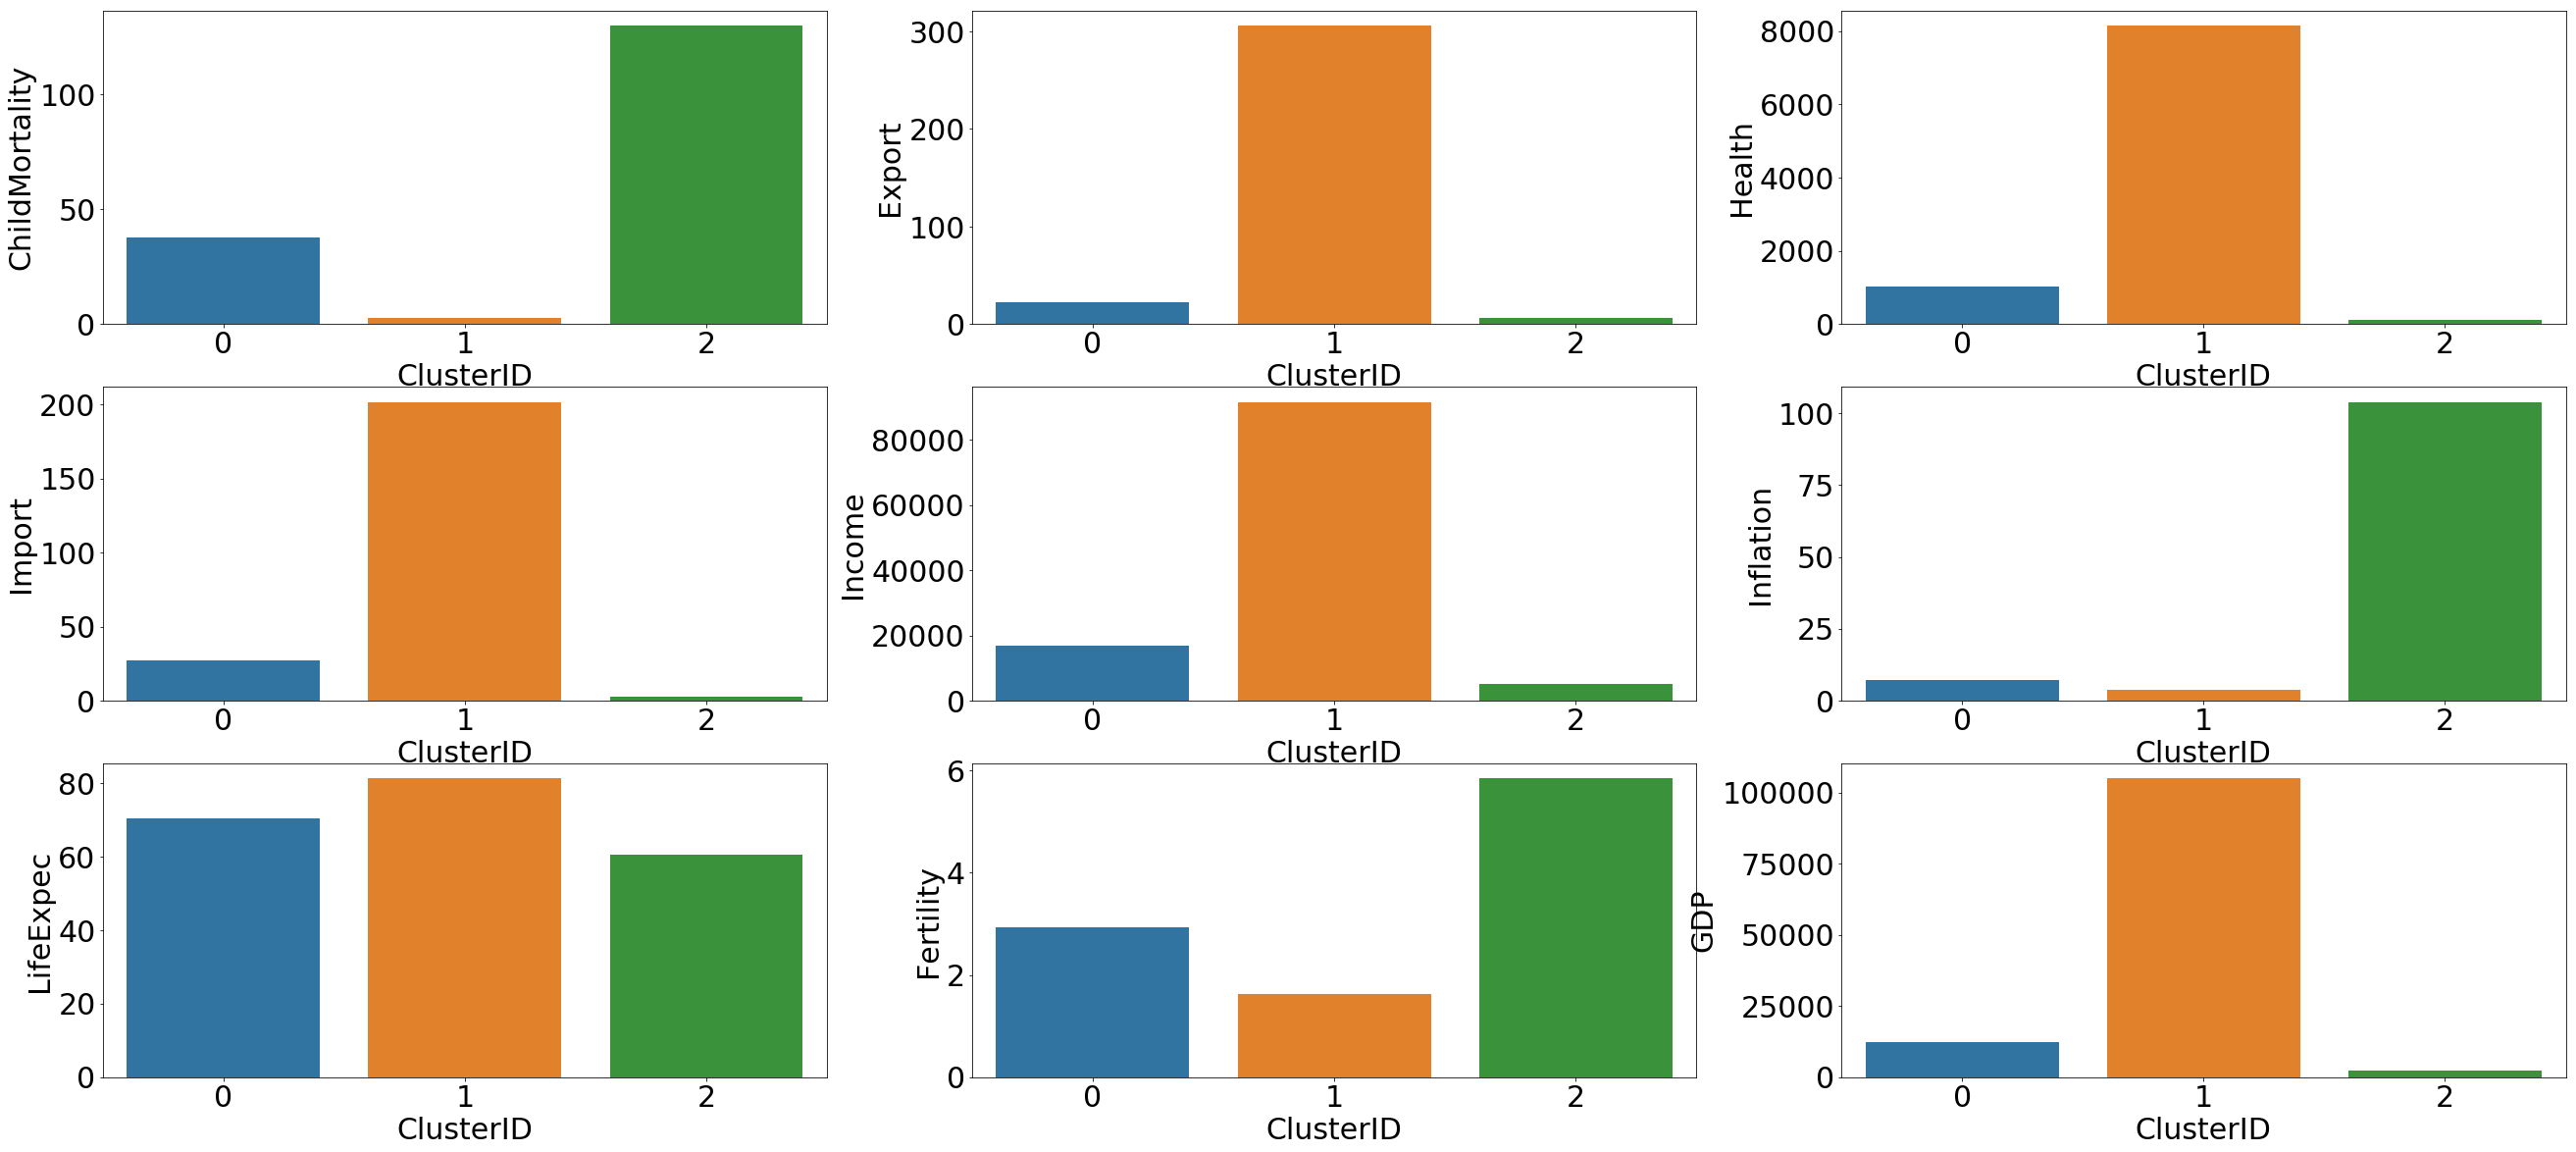

In [1104]:
plt.figure(figsize=(45, 20))
plt.rcParams.update({'font.size': 30})
plt.subplot(3,3,1)
sns.barplot(x=dfheiraS.ClusterID, y=dfheiraS.ChildMortality)
plt.subplot(3,3,2)
sns.barplot(x=dfheiraS.ClusterID, y=dfheiraS.Export)
plt.subplot(3,3,3)
sns.barplot(x=dfheiraS.ClusterID, y=dfheiraS.Health)
plt.subplot(3,3,4)
sns.barplot(x=dfheiraS.ClusterID, y=dfheiraS.Import)
plt.subplot(3,3,5)
sns.barplot(x=dfheiraS.ClusterID, y=dfheiraS.Income)
plt.subplot(3,3,6)
sns.barplot(x=dfheiraS.ClusterID, y=dfheiraS.Inflation)
plt.subplot(3,3,7)
sns.barplot(x=dfheiraS.ClusterID, y=dfheiraS.LifeExpec)
plt.subplot(3,3,8)
sns.barplot(x=dfheiraS.ClusterID, y=dfheiraS.Fertility)
plt.subplot(3,3,9)
sns.barplot(x=dfheiraS.ClusterID, y=dfheiraS.GDP)

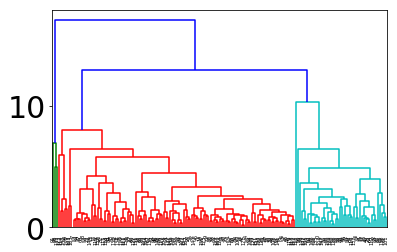

<Figure size 3240x1440 with 0 Axes>

In [1105]:
## Plotting the DendoGrams with Complete Method
mergings = linkage(normalized_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.figure(figsize=(45, 20))
plt.show()

In [1106]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
heiraDF = pd.concat([Data, clusterCut], axis=1)
heiraDF


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,1.000000,41.9174,20.1601,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,7.840000,267.8950,23.6196,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,14.745600,185.9820,9.8596,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,38.812900,100.6050,18.4041,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,20.702500,735.6600,34.6921,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,3.572100,834.3000,2.5600,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,4.326400,141.6800,20.5209,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,3.920400,4530.8700,4.3681,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,26.316900,5159.0000,22.8484,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,29.484900,343.3920,4.2849,16000,13.800,69.1,1.92,5840,1


In [1107]:
heiraDF = heiraDF.rename(columns = {0:'ClusterID'})

In [1108]:
hr_clustersChild = pd.DataFrame(heiraDF.groupby(["ClusterID"]).child_mort.mean())
hr_clustersExport = pd.DataFrame(heiraDF.groupby(["ClusterID"]).exports.mean())
hr_clustershealth = pd.DataFrame(heiraDF.groupby(["ClusterID"]).health.mean())
hr_clustersImport = pd.DataFrame(heiraDF.groupby(["ClusterID"]).imports.mean())
hr_clustersIncome = pd.DataFrame(heiraDF.groupby(["ClusterID"]).income.mean())
hr_clustersInf = pd.DataFrame(heiraDF.groupby(["ClusterID"]).inflation.mean())
hr_clustersLife = pd.DataFrame(heiraDF.groupby(["ClusterID"]).life_expec.mean())
hr_clustersFert = pd.DataFrame(heiraDF.groupby(["ClusterID"]).total_fer.mean())
hr_clustersGDP = pd.DataFrame(heiraDF.groupby(["ClusterID"]).gdpp.mean())

In [1109]:
dfheira = pd.concat([pd.Series([0,1,2]), hr_clustersChild, hr_clustersExport, hr_clustershealth, hr_clustersImport, 
               hr_clustersIncome, hr_clustersInf,hr_clustersLife, hr_clustersFert, hr_clustersGDP], axis=1)
dfheira.columns = ["ClusterID", "ChildMortality", "Export", "Health", "Import", "Income", "Inflation", "LifeExpec",
              "Fertility", "GDP"]
dfheira

,ClusterID,ChildMortality,Export,Health,Import,Income,Inflation,LifeExpec,Fertility,GDP
0,0,92.936957,11.541428,95.386972,22.769983,3405.500000,12.102283,59.541304,5.087174,1645.260870
1,1,17.827119,22.019675,1358.115546,24.201439,21308.559322,6.232686,74.572881,2.153898,16242.644068
2,2,4.133333,313.446667,3943.003333,247.186667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [ ]:
plt.figure(figsize=(45, 20))
plt.rcParams.update({'font.size': 30})
plt.subplot(3,3,1)
sns.barplot(x=dfheira.ClusterID, y=dfheira.ChildMortality)
plt.subplot(3,3,2)
sns.barplot(x=dfheira.ClusterID, y=dfheira.Export)
plt.subplot(3,3,3)
sns.barplot(x=dfheira.ClusterID, y=dfheira.Health)
plt.subplot(3,3,4)
sns.barplot(x=dfheira.ClusterID, y=dfheira.Import)
plt.subplot(3,3,5)
sns.barplot(x=dfheira.ClusterID, y=dfheira.Income)
plt.subplot(3,3,6)
sns.barplot(x=dfheira.ClusterID, y=dfheira.Inflation)
plt.subplot(3,3,7)
sns.barplot(x=dfheira.ClusterID, y=dfheira.LifeExpec)
plt.subplot(3,3,8)
sns.barplot(x=dfheira.ClusterID, y=dfheira.Fertility)
plt.subplot(3,3,9)
sns.barplot(x=dfheira.ClusterID, y=dfheira.GDP)

In [1027]:
heiraDF.loc[heiraDF['ClusterID'].isin([0])]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,1.000000,41.9174,20.1601,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,38.812900,100.6050,18.4041,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,5.664400,31.0780,13.8384,1820,0.885,61.8,5.36,758,0
25,Burkina Faso,116.0,3.686400,38.7550,8.7616,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,0.795664,26.7960,15.3664,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,4.928400,67.2030,7.2900,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,1.392400,17.7508,7.0225,888,2.010,47.5,5.21,446,0
32,Chad,150.0,13.542400,40.6341,18.9225,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,2.722500,34.6819,26.7289,1410,3.870,65.9,4.75,769,0
37,"Congo, Dem. Rep.",116.0,16.892100,26.4194,24.6016,609,20.800,57.5,6.54,334,0
